# Customer Churn Analysis

## Introduction
In this report, we analyze customer data to understand customer behavior, churn, and propose effective retention strategies.

# Data Overview
The churn data pertains to a fictional Telecommunications company operating in California. The dataset includes information on 7,043 customers and encompasses details regarding customer demographics, location, services, and current status.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("telecom_customer_churn.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

# Setting maximum coloumns to 40 to get view of all coloumns

In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
pd.isnull(df).sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

**Blank entries in certain columns of our dataset are intentional and represent the absence of a specific condition or event. Preserving these blanks is crucial for maintaining the dataset’s accuracy and integrity. For instance, only customers who have churned have a corresponding churn reason; for customers who have stayed or just joined, the churn reason is intentionally left blank as they have not experienced churn.**

In [7]:
# Get the count of different categories in the column named "Customer Status"
Customer_Status_count = df['Customer Status'].value_counts()
Customer_Status_count.columns = ['Customer Status', 'Count']

print("Customer Status Count:")
print(Customer_Status_count)

Customer Status Count:
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


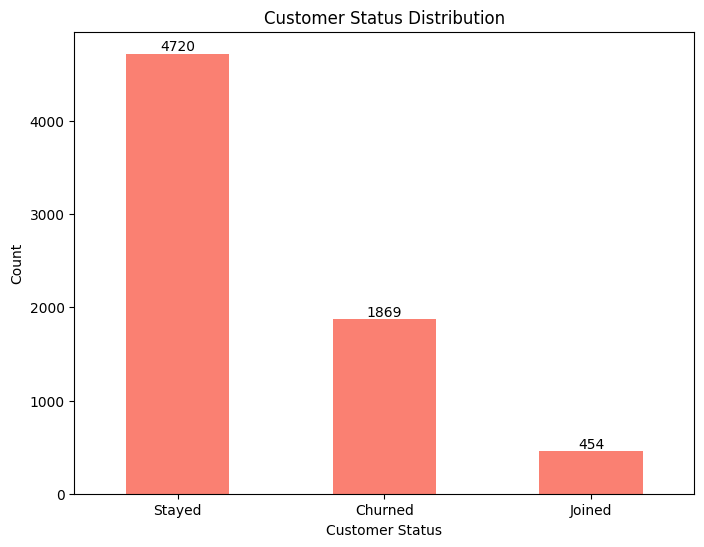

In [8]:
# Plotting Customer Status distribution
plt.figure(figsize=(8, 6))
customer_status_counts = df['Customer Status'].value_counts()
customer_status_counts.plot(kind='bar', color='salmon')

# Adding counts above each bar
for i, count in enumerate(customer_status_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show() 

*Adding a new column 'Customer Type' to categorize customer profiles as High Value, Normal, or New Customer based on average revenue and average tenure*

In [9]:
# Calculate average revenue and tenure
avg_revenue = df['Total Revenue'].mean()
avg_tenure = df['Tenure in Months'].mean()

# Define customer type based on conditions
def customer_type(row):
    if row['Customer Status'] == 'Joined':
        return 'New Customer'
    elif row['Total Revenue'] > avg_revenue and row['Tenure in Months'] > avg_tenure:
        return 'High Value'
    else:
        return 'Normal'

# Apply the function to create a new column
df['Customer Type'] = df.apply(customer_type, axis=1)

In [10]:
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Customer Type
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,Normal
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,Normal
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,Normal
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,Normal
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,Normal
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN,Normal
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN,High Value
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN,High Value
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,7,Offer E,Yes,10.53,No,Yes,DSL,21.0,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN,Normal
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,65,NaN,Yes,28.46,Yes,Yes,Cable,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN,High Value


# Analysis

# Customer Acquisition

In [11]:
# Get the count of different categories in the column named "Customer Type"
customer_type_count = df['Customer Type'].value_counts()
customer_type_count.columns = ['Customer Type', 'Count']

print("Customer Type Count:")
print(customer_type_count)

Customer Type Count:
Customer Type
Normal          4047
High Value      2542
New Customer     454
Name: count, dtype: int64


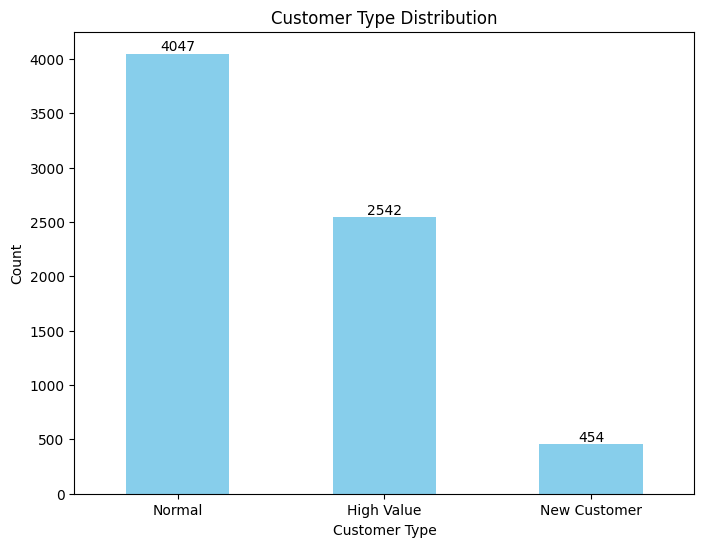

In [12]:
# Plotting Customer Type distribution
plt.figure(figsize=(8, 6))
customer_type_counts = df['Customer Type'].value_counts()
customer_type_counts.plot(kind='bar', color='skyblue')

# Adding counts above each bar
for i, count in enumerate(customer_type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
# How many customers joined the company during the last quarter? How many customers joined?
tenure_condition = df['Tenure in Months'].isin([1, 2, 3])
status_condition = df['Customer Status'] == 'Joined'
count = (tenure_condition & status_condition).sum()
print('customers joined in last quater:')
print(count)

customers joined in last quater:
454


In [14]:
#How many customers joined?
Total_joined_count= (status_condition).sum()
print('Total customers joined:')
print(Total_joined_count)

Total customers joined:
454


# Customer Profile

In [15]:
# What is the customer profile for a customer that churned, joined, and stayed? Are they different?
# Group by Customer Status and Customer Type and count the number of customers
customer_profile = df.groupby(['Customer Status', 'Customer Type']).size().reset_index(name='Count')

print("Customer Profile:")
print(customer_profile)

Customer Profile:
  Customer Status Customer Type  Count
0         Churned    High Value    366
1         Churned        Normal   1503
2          Joined  New Customer    454
3          Stayed    High Value   2176
4          Stayed        Normal   2544


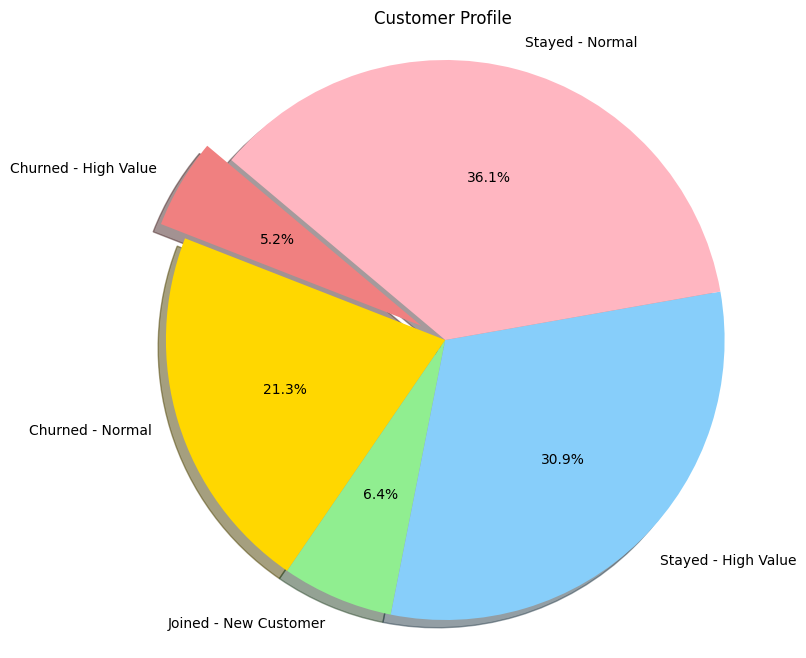

In [16]:
# plotting customer profile distribution
import matplotlib.pyplot as plt

# Data for the pie chart
labels = customer_profile['Customer Status'] + ' - ' + customer_profile['Customer Type']
sizes = customer_profile['Count']
colors = ['lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Profile')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Key Drivers of Customer Churn

In [17]:
#What seem to be the key drivers of customer churn?
#common churn reason for all
common_chrun_drivers = df['Churn Reason'].unique()
print('common churn drivers :')
print(common_chrun_drivers)

common churn drivers :
[nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services'
 'Competitor made better offer' "Don't know" 'Long distance charges'
 'Attitude of service provider' 'Attitude of support person'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Lack of affordable download/upload speed'
 'Deceased' 'Moved' 'Service dissatisfaction' 'Price too high'
 'Lack of self-service on Website' 'Poor expertise of online support'
 'Extra data charges' 'Poor expertise of phone support']


In [18]:
#unique drivers for Customers Churn Reasons for all customers with their count
common_churn_reasons = df['Churn Reason'].value_counts()
print("\nCustomers Churn Reasons for all customers:")
print(common_churn_reasons)


Customers Churn Reasons for all customers:
Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased    

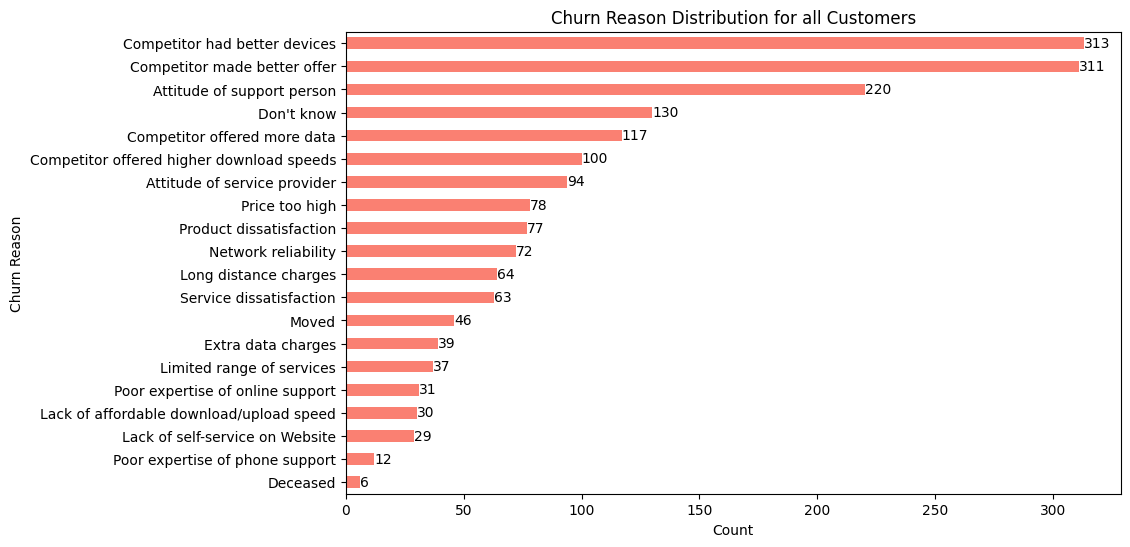

In [19]:
# Plotting Churn Reason distribution for all customers customers
plt.figure(figsize=(10, 6))
common_churn_reasons = df['Churn Reason'].value_counts().sort_values(ascending=True)
common_churn_reasons.plot(kind='barh', color='salmon')  # Plotting horizontal bar graph

# Adding counts in front of each bar
for i, count in enumerate(common_churn_reasons):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Churn Reason Distribution for all Customers')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.show()

# High-Value Customers

In [20]:
#creating dataframe for high value and churned
high_value_churned=df[(df['Customer Type']=='High Value') & (df['Customer Status']=='Churned')]

In [21]:
#counting total high value churned
Total_High_value_Churned_count=high_value_churned.shape[0]
print('Total High value Churned :')

print(Total_High_value_Churned_count)

Total High value Churned :
366


In [22]:
#unique drivers for high value churned
high_value_churn_drivers=high_value_churned['Churn Reason'].unique()
print('high_value_churn_drivers:')
print(high_value_churn_drivers)

high_value_churn_drivers:
['Limited range of services' 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support person'
 'Network reliability' 'Service dissatisfaction'
 'Competitor offered more data' 'Price too high'
 'Competitor made better offer' 'Attitude of service provider'
 'Lack of self-service on Website'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Product dissatisfaction'
 'Poor expertise of online support' 'Moved'
 'Poor expertise of phone support']


In [23]:
#unique drivers for high value churned with their count
high_value_churn_reasons = high_value_churned['Churn Reason'].value_counts()
print("\nHigh Value Customers Churn Reasons:")
print(high_value_churn_reasons)


High Value Customers Churn Reasons:
Churn Reason
Competitor made better offer                 59
Competitor had better devices                53
Attitude of support person                   36
Competitor offered more data                 30
Don't know                                   29
Competitor offered higher download speeds    23
Product dissatisfaction                      22
Attitude of service provider                 20
Price too high                               18
Network reliability                          15
Extra data charges                           12
Moved                                         9
Poor expertise of online support              8
Service dissatisfaction                       8
Lack of affordable download/upload speed      8
Long distance charges                         8
Limited range of services                     4
Lack of self-service on Website               2
Poor expertise of phone support               2
Name: count, dtype: int64


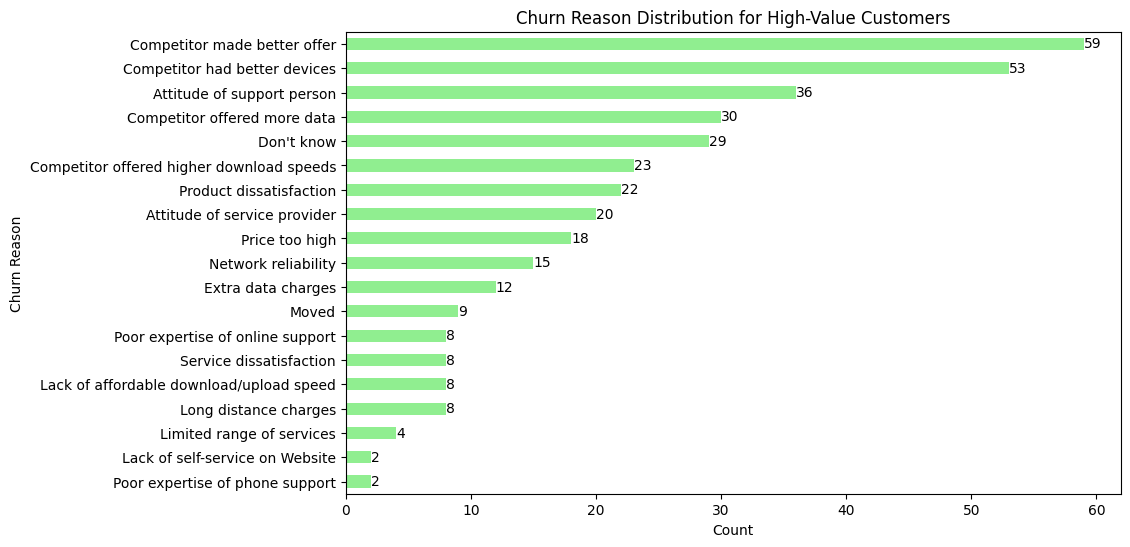

In [24]:
# Plotting Churn Reason distribution for high-value customers
plt.figure(figsize=(10, 6))
high_value_churn_reasons = high_value_churned['Churn Reason'].value_counts().sort_values(ascending=True)
high_value_churn_reasons.plot(kind='barh', color='lightgreen')  # Plotting horizontal bar graph

# Adding counts in front of each bar
for i, count in enumerate(high_value_churn_reasons):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Churn Reason Distribution for High-Value Customers')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.show()

# Conclusion:

#### Main Questions:
1. How many customers joined the company during the last quarter?
2. What is the customer profile for a customer that churned, joined, and stayed? Are they different?
3. What seem to be the key drivers of customer churn?
4. Is the company losing high-value customers? If so, how can they retain them?
   
## Analysis Findings

####  Customer Acquisition:
 The number of new customers who joined during the last quarter is  **454**, which is also the total number of customers who joined.

####  Customer Profile
 The following table summarizes the customer profile based on their status and type, including churned, joined, and stayed customers. The 'Count' section indicates the number of customers in each category:
| Customer Status | Customer Type | Count |
|-----------------|---------------|-------|
| Churned         | High Value    |    366|
| Churned         | Normal        |   1503|
| Joined          | New Customer  |    454|
| Stayed          | High Value    |   2176|
| Stayed          | Normal        |   2544|

#### Key Drivers of Customer Churn
- The primary reason for customer churn is the availability of better offers and devices provided by competitors.

- Dissatisfaction with the attitude of support personnel and service providers also significantly contributes to customer churn.

- Issues related to pricing, including high prices and additional data charges, constitute the third major reason for churn.

- Network reliability emerges as the fourth significant factor leading to customer churn.

- Service dissatisfaction, encompassing both online services and general customer support, constitutes the fifth significant reason for churn

#### Retention Strategy for High-Value Customers

Analysis indicates that the company is experiencing a loss of High-Value customers. To mitigate churn, the company should focus on:

- Improving competitive offerings
- Enhancing customer service interactions
- Revising pricing strategies
- Addressing network reliability concerns
- Optimizing service delivery

# Recommendations
#### Addressing Competition:

- **Improve Competitive Offerings:**  While it may be challenging to match competitors' offers and devices, we should focus on highlighting the superior service our company provides. Emphasizing problem-solving and customer service will help differentiate our company in the market.

#### Enhancing Customer Service Interactions:

- **Invest in Customer Service Training:** Addressing the issue of attitude problems among support personnel is crucial. We should invest in training programs to improve customer service skills and ensure that all employees prioritize customer satisfaction.

#### Revising Pricing Strategies:

- **Optimize Pricing:** To combat high churn rates due to pricing, we need to consider revising our pricing strategies. Conducting market research will ensure our pricing remains competitive while still providing value to our customers.

#### Addressing Network Reliability Concerns:

- **Improve Network Reliability:** Identifying and addressing issues related to network reliability promptly is essential. We need to invest in infrastructure and technology upgrades to ensure a more reliable network for our customers.

#### Optimizing Service Delivery:

- **Expand Service Offerings:** Addressing the issue of limited services by expanding our service offerings is critical. We should identify the modern services that customers demand and work towards integrating them into our service portfolio. Additionally, focusing on providing more self-service options through our website will improve overall service delivery efficiency.

# References
**Data Source:**
- Telecom Customer Churn Dataset. Retrieved from Maven Analytics Data Playground (Accessed: 2024)